In [4]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import chardet

In [5]:
hotel = pd.read_csv("./hotels.csv", skipinitialspace=True, parse_dates=['Date_of_Booking', 'Check_In_Date', 'Check_Out_Date'], encoding='latin1')
hotel.head()

,Unnamed: 0,Booking_ID,Date_of_Booking,Time,Customer_ID,Gender,Age,Origin_Country,State,Location,...,Check_Out_Date,Rooms,Hotel_Name,Hotel_Rating,Payment_Mode,Bank_Name,Booking_Price,Discount,GST,Profit_Margin
0,0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42.0,Malaysia,Johor,Iskandar Puteri,...,2010-01-20,1.0,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243.0,1,0.07,0.25
1,1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44.0,Indonesia,Ciawi,West Java,...,2010-01-22,2.0,Enchanted Isle,4.2,Wallet,EZ-Link,312.0,0,0.07,0.24
2,2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31.0,Singapore,Central,Rochor,...,2010-01-09,2.0,Seacoast Hotel,4.5,Credit Card,Grab,338.0,19,0.07,0.20
3,3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28.0,Singapore,North,Yishun,...,2010-02-19,2.0,Night In Paradise,4.2,Debit Card,DBS Paylah,254.0,19,0.07,0.13
4,4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44.0,Cambodia,Phnom Trop,Pursat,...,2010-01-06,3.0,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313.0,15,0.07,0.17


# build a predictive model to forecast booking trends based on historical data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

The script below performs the following steps:

1. Loads the dataset and performs basic feature engineering.
2. Selects relevant features and defines the target variable.
3. Splits the data into training and testing sets.
4. Builds a Random Forest Regressor model.
5. Evaluates the model using Mean Squared Error.
6. Visualizes the predictions vs. actual values.

Mean Squared Error: 9221.634415309465


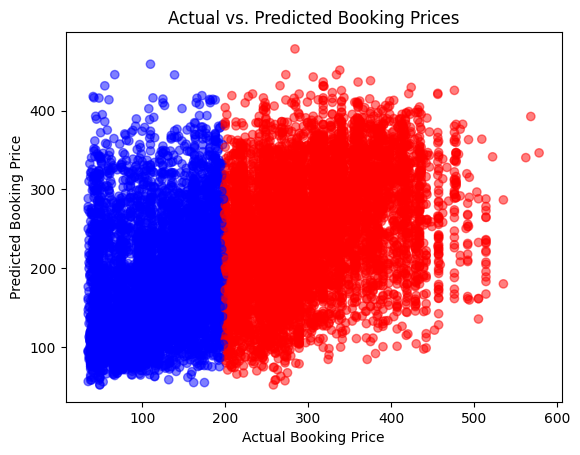

In [7]:
hotel['Booking_Month'] = hotel['Date_of_Booking'].dt.month
hotel['Booking_Day'] = hotel['Date_of_Booking'].dt.day
hotel['Booking_Weekday'] = hotel['Date_of_Booking'].dt.weekday
features = ['Booking_Month', 'Booking_Day', 'Booking_Weekday', 'Rooms', 'Hotel_Rating']
target = 'Booking_Price'
X_train, X_test, y_train, y_test = train_test_split(hotel[features], hotel[target], test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
colors = np.where(y_test < np.percentile(y_test, 50), 'blue', 'red')

# Visualize predictions vs. actual values
plt.scatter(y_test, predictions, c=colors, alpha=0.5)
plt.xlabel('Actual Booking Price')
plt.ylabel('Predicted Booking Price')
plt.title('Actual vs. Predicted Booking Prices')
plt.show()

# evaluate the model's accuracy and potential use in optimizing resources or pricing strategies

Feature Importance: Explore feature importance to understand which features have the most significant impact on the model's predictions

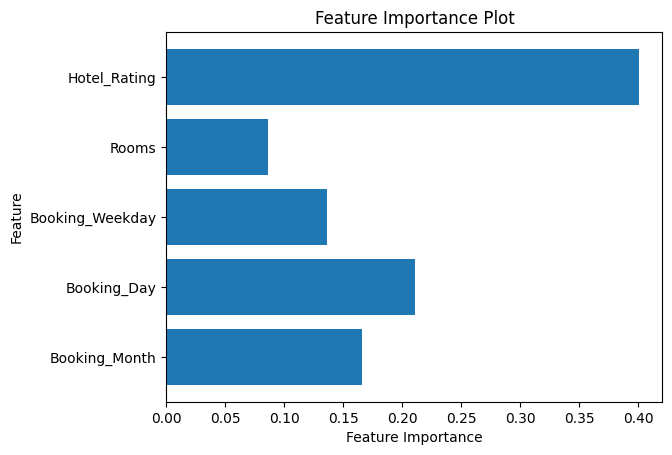

In [8]:
feature_importances = model.feature_importances_
feature_names = features

# Plot feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
